# Assigment 5 - Bayesian Classifier and Gaussian Mixture Models

In the 5th assigment of the class we will study the Bayes Classifier.  

We will start with a quick demonstration of Gaussian Mixture Models with sklearn.

You have to implement two different variants of the bayes classifier using the assumption that the conditional probability P(x|y):
   1. Gaussian Bayes Classifier. P(x|y) ~ Gaussian Distribution (Normal)
   2. Gaussian Mixture Bayes Classifier. P(x|y) ~ Gaussian Mixture Model  

# A. Demonstration Gaussian mixture model

#### 1 . Probability density function (pdf) of Multivariate Gaussian Distribution:

$${ f_{\mathbf {X} }(x_{1},\ldots ,x_{k}; \mu,\Sigma)={\frac {\exp \left(-{\frac {1}{2}}\left({\mathbf {x} }-{\boldsymbol {\mu }}\right)^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}\left({\mathbf {x} }-{\boldsymbol {\mu }}\right)\right)}{\sqrt {(2\pi )^{k}|{\boldsymbol {\Sigma }}|}}}}$$


$$\Sigma \text{: is the covariance matrix} $$
$$\mu \text{: mean of the distribution} $$

In [82]:
import numpy as np
from scipy.stats import multivariate_normal as mvn
import numpy as np

# example of the multi variate normal distribution with scipy
mean = [0, 0]
cov = [[1,0],
       [0,1]]
dist = mvn(mean=mean, cov=cov)
x = [0, 0]
print("CDF:", dist.pdf(x))

CDF: 0.15915494309189535


#### 2. in the case of mixture of gaussian model the final Propability density fuction is as bellow:

$$f_{GMM}(x_{1},\ldots ,x_{k})= \sum_{i=1}^{k} w_k f_{\mathbf {X} }(x_{1},\ldots ,x_{k};  \mu_i,\Sigma_i),s.t  \sum_{i=1}^{k} w_k  = 1$$


The model can be fit using the EM algorithm to find our parameters :
 1. $ w_k $ : weight of each gaussian, or the prior probability of the gaussian k, p(k)
 1. $ \mu_k $ : the mean of each the gaussian 
 1. $ \Sigma_k $: the covariance of each gaussian

lets generate some data

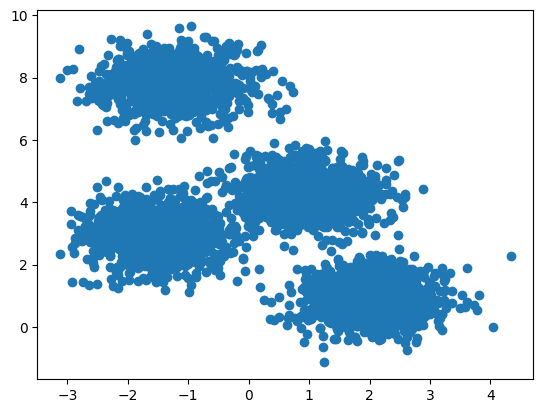

In [206]:
from sklearn.datasets._samples_generator import make_blobs
import matplotlib.pyplot as plt

# generate some data
X, y_true = make_blobs(n_samples=4000, centers=4, cluster_std=0.60, random_state=0)

plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.show()
plt.close()

In [207]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(X)

GaussianMixture(n_components=4)

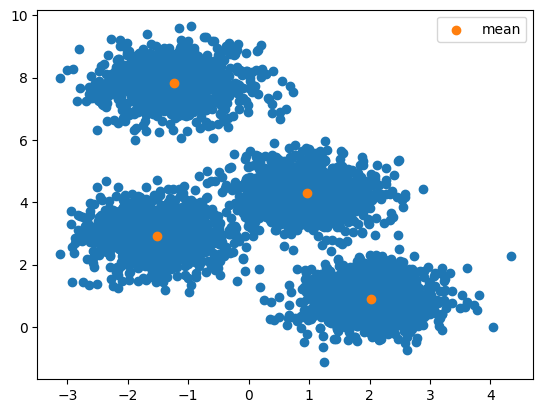

In [208]:
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], label = "mean")
plt.legend()
plt.show()
plt.close()

In [209]:
# weights of each Gaussian i.e p(k)
w_k = gmm.weights_
w_k

array([0.24995563, 0.24928842, 0.25010392, 0.25065202])

In [210]:
# mean of each gaussian
means = gmm.means_
means

array([[-1.23824476,  7.81555656],
       [ 0.95919476,  4.29696274],
       [ 2.01630043,  0.90234062],
       [-1.5205758 ,  2.92071074]])

In [211]:
# mean of each gaussian
cov = gmm.covariances_
cov

array([[[ 0.37956024, -0.00096594],
        [-0.00096594,  0.33053861]],

       [[ 0.34150938, -0.00421972],
        [-0.00421972,  0.34663498]],

       [[ 0.3521316 , -0.00251558],
        [-0.00251558,  0.34816653]],

       [[ 0.35307953, -0.00442887],
        [-0.00442887,  0.36458914]]])

In [231]:
# the propability of p(k | x)
gmm.predict_proba(X)

array([[9.99991569e-01, 8.43121573e-06, 1.61916536e-52, 1.33962827e-31],
       [2.31130240e-26, 1.00000000e+00, 8.38477833e-87, 8.24014695e-45],
       [3.64710314e-30, 1.00000000e+00, 2.26739419e-83, 3.04745553e-40],
       ...,
       [9.99999661e-01, 3.39362226e-07, 4.73538945e-33, 1.28590054e-16],
       [3.08558993e-01, 6.91441006e-01, 1.64340309e-29, 3.81819767e-10],
       [1.00000000e+00, 2.60447274e-10, 3.17039755e-24, 8.65671525e-12]])

# Propability Density Function of Gaussian Mixture Model

$$f_{GMM}(x_{1},\ldots ,x_{k})= \sum_{i=1}^{k} w_k f_{\mathbf {X} }(x_{1},\ldots ,x_{k};  \mu_i,\Sigma_i),s.t  \sum_{i=1}^{k} w_k  = 1$$

In [212]:
# pdf of gmm
x = (0, 0)

def pdf_mixture(x, w, means, cov):
    n_componets = len(means)
    p_x = 0
    for k in range(n_componets):
        p_x += w[k] * mvn(mean=means[k], cov=cov[k]).pdf(x)
    return p_x

In [213]:
pdf_mixture(x, w_k,  means, cov)

0.00010584089218250922

In [214]:
# notes 1.  if we use covariance_type="diag" the covariance metrix is diagonal

In [215]:
gmm = GaussianMixture(n_components=4, random_state=0, covariance_type="diag")
gmm.fit(X)

GaussianMixture(covariance_type='diag', n_components=4, random_state=0)

In [216]:
# so the cov in a list with the components of the diagonal
gmm.covariances_

array([[0.35306517, 0.36506761],
       [0.37956783, 0.33056489],
       [0.35218237, 0.34835942],
       [0.34120551, 0.34680435]])

In [218]:
# the covariance in case of full matrix
cov

array([[[ 0.37956024, -0.00096594],
        [-0.00096594,  0.33053861]],

       [[ 0.34150938, -0.00421972],
        [-0.00421972,  0.34663498]],

       [[ 0.3521316 , -0.00251558],
        [-0.00251558,  0.34816653]],

       [[ 0.35307953, -0.00442887],
        [-0.00442887,  0.36458914]]])

# Step 1. Bayesian Classifier with Gaussian Model

We begin with the implementation of the Gaussian Naive Bayes Classifier.

In the naive Bayes Classifier you have to calculate:
1. the prior for each class p(y)
2. the parameters of the gaussian distribution for each class y in order to model p(x|y) according to their empirical values

After obtain the parameter we can get posterior. The final prediction of our model can be the class with the maximum posterior.

Fill the class below and use it to:   
1. fit your model using .fit() method
2. get the propabilities of each class for the different X using .predict_proba() method
3. make the final predictions using the .predict() method and calculate the accuracy of your model

In [219]:
class GaussianNaiveBayesClassifier:
    """
    Implementation of Naive Bayes Classifier
    """

    def __init__(self):
        # initialization of required variables.
        self.models = None # p(x|y)
        self.prior = None # p(y)
        self.n_classes = None
        self.n_features = None

    def fit(self, X, y):
        """
        Calculate the parameters of the gaussian models for each class i.e P(x|y), as well as the prior class probabilities P(y).
        :param X: The input features
        :param y: The labels
        :return: nothing
        """
        self.n_features = X.shape[1]
        classes = set(y)
        self.n_classes = len(set(y))

        self.models = np.zeros(shape=(1, self.n_classes))
        for class_y in range(self.n_classes):
            # Calculate the prior P(y) for each class
            # fill your code
            
            # Calculate the different model P(x|y) by find the parameters of the gaussian for each class
            # fill your code
            self.models.append()

    def predict_proba(self, X):
        """
        Calculate the posterior probability of each class given the features, i.e. P(y|x).
        You can calculate this with Bayes's theorem:
                    P(y|x) = P(x|y) P(y) / P(x).
                    P(y|x): The Posterior probability
                    P(x|y): The Likelihood probability
                    P(y): Prior probability
                    P(x): The evidence \sum_{y'} P(x|y') P(y')
        :param X:
        :return:
        """
        n_examples = X.shape[0]
        posterior = np.zeros([self.n_classes, n_examples])
        ## FILL IN
        for y_index in range(self.n_classes):
 
        return posterior

    def predict(self, X):
        """
        Make predicted class with the maximum posterior P(y|x)
        :param X:
        :return: the predicted class
        hint: use the predict_proba class
        """
        prediction =
        return

IndentationError: expected an indented block (1035188548.py, line 50)

In [220]:
# lets generate some to use to train our models
centers = [(-10,5), (0,0),(0,10), (-7,10)]
X_y_0, _ = make_blobs(n_samples=4000, centers=centers, cluster_std=1.00, random_state=0)
centers = [(-5,5), (-5,-2)]
X_y_1, _ = make_blobs(n_samples=2000, centers=centers, cluster_std=1.00, random_state=0)
X = np.concatenate([X_y_0, X_y_1],axis=0)
Y = np.concatenate([[0]*4000, [1]*2000],axis=0)

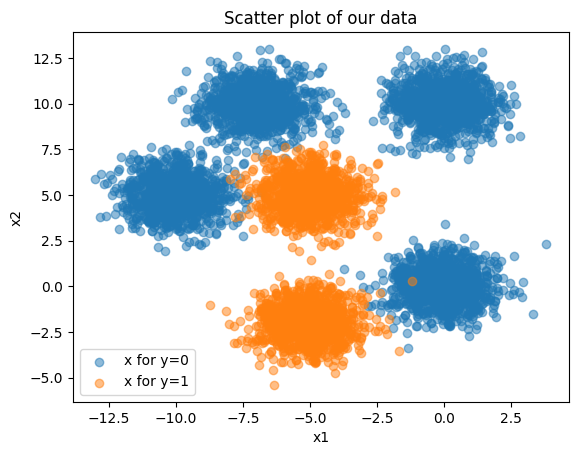

In [229]:
# plt.scatter(X[:,0], X[:,1], color =["r" if y == 1 else "g" for y in Y], alpha = 0.5)
plt.figure()
plt.title("Scatter plot of our data")
plt.scatter(X_y_0[:,0], X_y_0[:,1], alpha = 0.5, label = "x for y=0")
plt.scatter(X_y_1[:,0], X_y_1[:,1], alpha = 0.5, label = "x for y=1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

# Step 2.  Bayesian Classifier with Gaussian mixture model

Implement the Bayesian Classifier with Gaussian mixture model.
The model is as before, but instead of using the Gaussian Distribution to model the P(x|y) for each class, we use a mixture of Gaussian's.

So you have to find the parameters of a GMM ($w_k$, $m_k$, $cov_k$) for each different y.  
note: To fit the gmm of each class y you can use the sklearn as we demonstrate before

Fill the class below and use it to get:  
1. fit your model using .fit() method
2. the propabilities of each class for the different x using .predict_proba() method
3. make the final predictions using the .predict() method and calculate the accuracy of your model
4. compare the result with the gaussian bayes classifier

In [222]:
class GaussianMixtureNaiveBayesClassifier:
    """
    Implementation of Gaussian Mixture Naive Bayes Classifier
    """

    def __init__(self):
        # initialization of required variables.
        self.models = None # p(x|y)
        self.prior = None # p(y)
        self.n_classes = None
        self.n_features = None

    def fit(self, X, y):
        """
        Calculate the parameters of the gaussian mixture model for each class i.e P(x|y), as well as the prior class probabilities P(y).
        :param X: The input features
        :param y: The labels
        :return: nothing
        """
        self.n_features = X.shape[1]
        classes = set(y)
        self.n_classes = len(set(y))

        self.models = np.zeros(shape=(1, self.n_classes))
        for class_y in range(self.n_classes):
            # Calculate the prior P(y) for each class
            # fill your code
            
            # Calculate the different model P(x|y) by find the parameters of the mixture of gaussians for each class
            # fill your code
            self.models.append()

    def predict_proba(self, X):
        """
        Calculate the posterior probability of each class given the features, i.e. P(y|x).
        You can calculate this with Bayes's theorem:
                    P(y|x) = P(x|y) P(y) / P(x).
                    P(y|x): The Posterior probability
                    P(x|y): The Likelihood probability
                    P(y): Prior probability
                    P(x): The evidence \sum_{y'} P(x|y') P(y')
        :param X:
        :return:
        """
        n_examples = X.shape[0]
        posterior = np.zeros([self.n_classes, n_examples])
        # fill your code
        for y_index in range(self.n_classes):
 
        return posterior

    def predict(self, X):
        """
        Make predicted class with the maximum posterior P(y|x)
        :param X:
        :return: the predicted class
        hint: use the predict_proba class
        """
        # fill your code
        prediction =
        return

IndentationError: expected an indented block (2874470835.py, line 50)